<a href="https://colab.research.google.com/github/miguelorduna360-alt/Debt/blob/main/GlobalDebtDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Research Question:

In [23]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, accuracy_score

Data Exploration: DEBT

In [36]:
url = 'https://raw.githubusercontent.com/miguelorduna360-alt/Somethin/refs/heads/main/DataForDebt%20for%20the%20USA%20-%20DataForDebt%20-%20Data%20(1).csv'
debt_df = pd.read_csv(url)
debt_df

,Year,Total Private Debt All instruments,Total Private Debt: Loans and Debt Securities,"Household debt, all instruments","Household debt, loans and debt securities","Non-financial corporations debt, all instruments","Non-financial corporations debt, loans and debt securities",Public sector debt,Nonfinancial public sector debt,General government debt,Central government debt,Nominal gross domestic product
0,1950,75.83,55.31,25.48,24.80,50.34,30.51,NaN,NaN,83.13,78.20,301.78
1,1951,72.69,53.66,24.52,23.91,48.17,29.75,NaN,NaN,72.96,68.20,348.99
2,1952,88.24,56.56,26.60,25.98,61.64,30.58,NaN,NaN,72.53,66.34,368.03
3,1953,88.05,58.02,28.43,27.79,59.62,30.22,NaN,NaN,71.75,64.60,389.15
4,1954,106.06,62.57,31.54,30.86,74.52,31.71,NaN,NaN,73.57,64.96,390.28
...,...,...,...,...,...,...,...,...,...,...,...,...
69,2019,229.96,153.39,77.05,75.11,152.91,78.28,NaN,NaN,108.71,92.39,21539.98
70,2020,238.75,164.80,80.48,78.46,158.28,86.33,NaN,NaN,132.93,116.88,21354.13
71,2021,229.76,160.50,79.51,77.75,150.25,82.76,NaN,NaN,125.25,111.90,23681.18
72,2022,227.77,156.12,76.63,75.47,151.14,80.65,NaN,NaN,119.52,107.54,26006.90


In [37]:
debt_df = debt_df.apply(pd.to_numeric, errors='coerce')

debt_df.fillna(0, inplace=True)
debt_df.value_counts()

debt_df.drop(columns=['Public sector debt', 'Nonfinancial public sector debt'], inplace=True)
display(debt_df)

,Year,Total Private Debt All instruments,Total Private Debt: Loans and Debt Securities,"Household debt, all instruments","Household debt, loans and debt securities","Non-financial corporations debt, all instruments","Non-financial corporations debt, loans and debt securities",General government debt,Central government debt,Nominal gross domestic product
0,1950,75.83,55.31,25.48,24.80,50.34,30.51,83.13,78.20,301.78
1,1951,72.69,53.66,24.52,23.91,48.17,29.75,72.96,68.20,348.99
2,1952,88.24,56.56,26.60,25.98,61.64,30.58,72.53,66.34,368.03
3,1953,88.05,58.02,28.43,27.79,59.62,30.22,71.75,64.60,389.15
4,1954,106.06,62.57,31.54,30.86,74.52,31.71,73.57,64.96,390.28
...,...,...,...,...,...,...,...,...,...,...
69,2019,229.96,153.39,77.05,75.11,152.91,78.28,108.71,92.39,21539.98
70,2020,238.75,164.80,80.48,78.46,158.28,86.33,132.93,116.88,21354.13
71,2021,229.76,160.50,79.51,77.75,150.25,82.76,125.25,111.90,23681.18
72,2022,227.77,156.12,76.63,75.47,151.14,80.65,119.52,107.54,26006.90


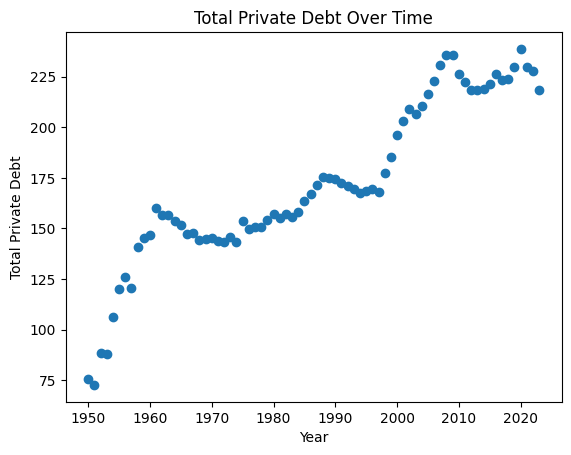

In [32]:
plt.scatter(debt_df['Year'], debt_df['Total Private Debt All intstruments'])
plt.xlabel('Year')
plt.ylabel('Total Private Debt')
plt.title('Total Private Debt Over Time')
plt.show()